In [1]:
# Importing Required Libraries

# Libraries required for Loading the data and for EDA
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import scipy.stats as st

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Libraries required for Modelling
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn import tree, model_selection
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

# Libraries required for scoring
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import metrics

#Others
import re
import wordcloud #will use for the word cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

**Step 2:** Read the dataset.csv data from the Resources folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
data = Path('Restaurants_Yelp_with_Sentiment.csv')
df = pd.read_csv(data)

# Review the DataFrame (displayed both head and tail)
display(df.head())
display(df.tail())

,Restaurant_name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,4,busy place strongly suggest a reservation gre...,0.9485,Good
1,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,4,i recommend squid is the best part i ordered g...,0.8979,Good
2,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,5,i really enjoyed my lunch at this cozy little ...,0.9966,Good
3,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,5,ambiance is great with a great mixture of wood...,0.9892,Good
4,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,5,we went to the flying pig for dinner last nigh...,0.9845,Good


,Restaurant_name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
8081,Nomé Izakaya,Lounges,"4848 Yonge Street Toronto, ON M2N 5N2 Canada",ON,43.762508,-79.411549,5,so happy to be so close to one of my favourite...,0.9658,Good
8082,Nomé Izakaya,Lounges,"4848 Yonge Street Toronto, ON M2N 5N2 Canada",ON,43.762508,-79.411549,4,had dinner with a group of 6 on their spacious...,0.8625,Good
8083,Nomé Izakaya,Lounges,"4848 Yonge Street Toronto, ON M2N 5N2 Canada",ON,43.762508,-79.411549,4,food tasted pretty good we enjoyed the seared ...,0.9337,Good
8084,Nomé Izakaya,Lounges,"4848 Yonge Street Toronto, ON M2N 5N2 Canada",ON,43.762508,-79.411549,5,what a susprised for this little izakaya we c...,0.8910,Good
8085,Nomé Izakaya,Lounges,"4848 Yonge Street Toronto, ON M2N 5N2 Canada",ON,43.762508,-79.411549,4,definitely on the pricey side but loved the cr...,0.9908,Good


**Step 3**: Perform Exploratory Data Analysis (EDA)

This step includes generating descriptive statistics and visualizing the data

In [4]:
# Generating descriptive statistics
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,Restaurant_name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
count,8086,8086,8086,8086,8086.000000,8086.000000,8086.000000,8081,8086.000000,8086
unique,1397,131,1520,12,NaN,NaN,NaN,7549,NaN,2
top,Happy Veal Hot Pot,Canadian (New),"1333 S Park Street Halifax, NS B3J 2K9 Canada",BC,NaN,NaN,NaN,we chose a type of soup that half normal and h...,NaN,Good
freq,120,665,125,1390,NaN,NaN,NaN,24,NaN,7083
mean,NaN,NaN,NaN,NaN,48.221882,-90.776586,4.316226,NaN,0.770524,NaN
std,NaN,NaN,NaN,NaN,3.360858,24.101966,1.151934,NaN,0.408599,NaN
min,NaN,NaN,NaN,NaN,43.637557,-135.099003,1.000000,NaN,-0.993000,NaN
25%,NaN,NaN,NaN,NaN,45.939953,-114.060468,4.000000,NaN,0.810000,NaN
50%,NaN,NaN,NaN,NaN,48.405454,-89.220244,5.000000,NaN,0.930000,NaN
75%,NaN,NaN,NaN,NaN,49.893490,-66.665421,5.000000,NaN,0.970000,NaN


In [5]:
# Checking the data types for each features
df.dtypes

Restaurant_name     object
Category            object
Address             object
Province            object
Latitude           float64
Longitude          float64
Rating               int64
Review              object
Sentiment_score    float64
Sentiment           object
dtype: object

In [6]:
# Determine the number of unique values in each column.
df.nunique()

Restaurant_name    1397
Category            131
Address            1520
Province             12
Latitude           1511
Longitude          1511
Rating                5
Review             7549
Sentiment_score    2415
Sentiment             2
dtype: int64

In [7]:
# Check the category for 'Targets'
type_counts = df['Sentiment'].value_counts()
type_counts

Good    7083
Bad     1003
Name: Sentiment, dtype: int64

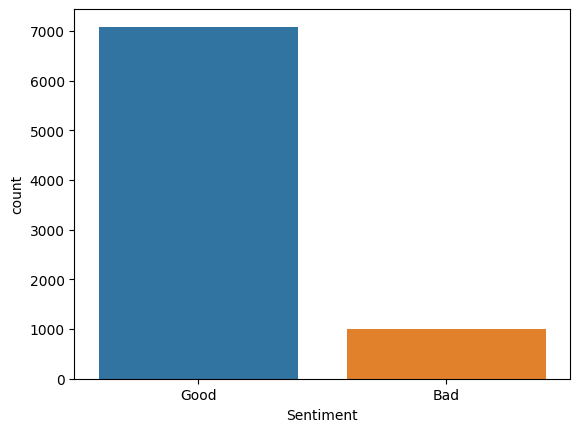

In [8]:
# Visualize the 'Sentiment' data
sns.countplot(x ='Sentiment', data=df)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_name  8086 non-null   object 
 1   Category         8086 non-null   object 
 2   Address          8086 non-null   object 
 3   Province         8086 non-null   object 
 4   Latitude         8086 non-null   float64
 5   Longitude        8086 non-null   float64
 6   Rating           8086 non-null   int64  
 7   Review           8081 non-null   object 
 8   Sentiment_score  8086 non-null   float64
 9   Sentiment        8086 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 631.8+ KB


In [10]:
# Convert 'Good' to 1, and 'Bad' to 0
df['Sentiment'] = df['Sentiment'].map({'Good': 1, 'Bad': 0})
df.head()

,Restaurant_name,Category,Address,Province,Latitude,Longitude,Rating,Review,Sentiment_score,Sentiment
0,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,4,busy place strongly suggest a reservation gre...,0.9485,1
1,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,4,i recommend squid is the best part i ordered g...,0.8979,1
2,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,5,i really enjoyed my lunch at this cozy little ...,0.9966,1
3,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,5,ambiance is great with a great mixture of wood...,0.9892,1
4,The Flying Pig,Canadian (New),"1168 Hamilton Street Unit 104 Vancouver, BC V6...",BC,49.275039,-123.122038,5,we went to the flying pig for dinner last nigh...,0.9845,1


In [11]:
unique_Sentiment = df['Sentiment'].unique()
print(unique_Sentiment)

[1 0]


In [12]:
#Review Counts Per Category
Category = df['Category'].str.upper()
Category.value_counts().head(10)

CANADIAN (NEW)        665
CHINESE               518
JAPANESE              460
PIZZA                 410
ITALIAN               340
SEAFOOD               340
BREAKFAST & BRUNCH    340
FRENCH                270
MEXICAN               250
THAI                  230
Name: Category, dtype: int64

**Word Cloud.** Frequency of popular words.

In [13]:
text = df.Review[0]

In [14]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

In [15]:
#To build a wordcloud, we have to remove NULL values first:
df["Review"] = df["Review"].fillna(value="")

In [16]:
#Now let's add a string value instead to make our Series clean:
word_string=" ".join(df['Review'].str.lower())

(-0.5, 1599.5, 799.5, -0.5)

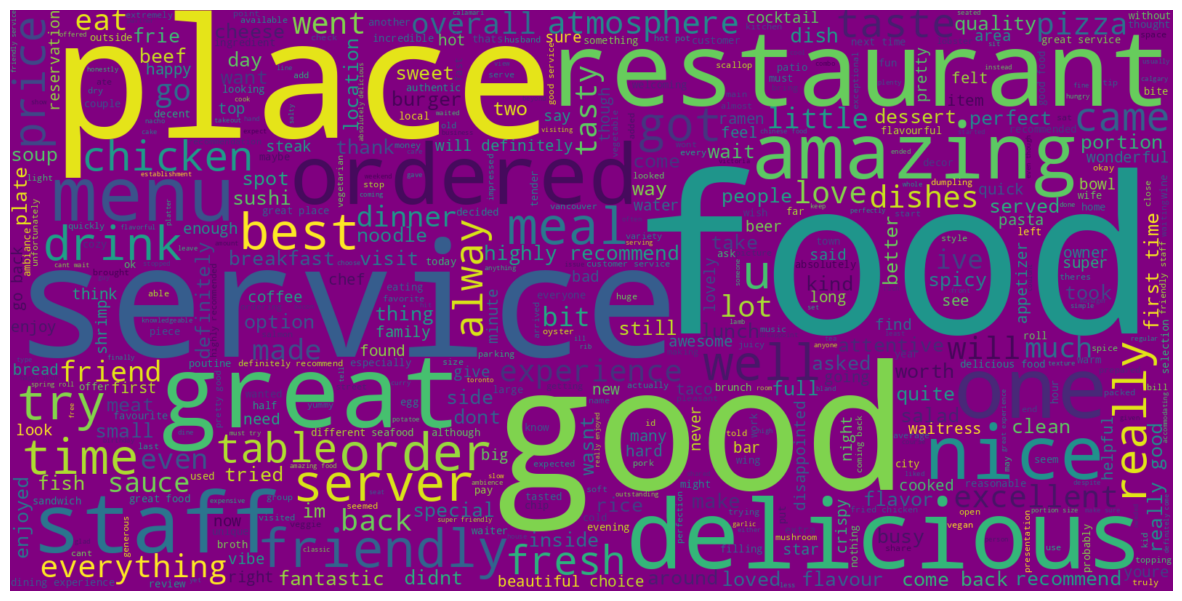

In [17]:
#Text lotting:

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", max_words=500, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

Split data-set to train and test

In [18]:
X = df['Review']
Y = df['Sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

**Step 4:** Data Cleaning

In [19]:
# function to remove html elements from the reviews
from bs4 import BeautifulSoup
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()
    return clean_HTML

In [20]:
# function to remove special characters and numbers from the reviews
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)
    return clean_SpecialChar

In [21]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))

In [22]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    X_train_cleaned.append(val)

In [23]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of
# raw strings.
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

**Step 5:** Data Modelling

In [24]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_tvec, Y_train)

RandomForestClassifier()

In [25]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
ranfrst_predictions = rf.predict(tvec.transform(X_test))
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("red", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.870000,0.130000,0.230000,201.000000
1,0.890000,1.000000,0.940000,1417.000000
accuracy,0.890000,0.890000,0.890000,0.890000
macro avg,0.880000,0.570000,0.590000,1618.000000
weighted avg,0.890000,0.890000,0.850000,1618.000000


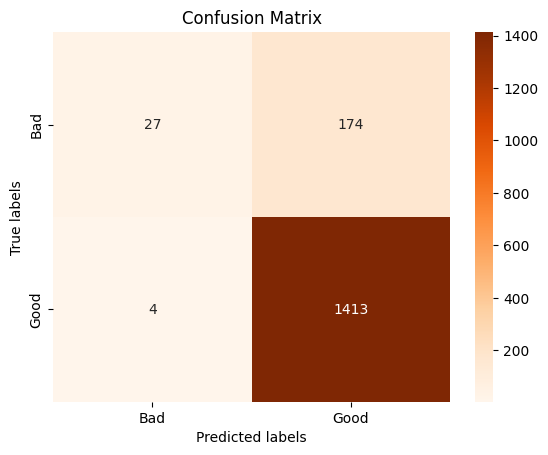

In [26]:
# confusion matrix
ranfrst_predictions=rf.predict(tvec.transform(X_test))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good']);

In [27]:
# testing the model with sample 'Bad' review
demo_review = np.array(['worst restaurant'])
demo_review_X_test = tvec.transform(demo_review)
print(rf.predict(demo_review_X_test))

[0]


In [28]:
# testing the model with sample 'good' review
demo_review_2 = np.array(['good food'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(rf.predict(demo_review_X_test_2))

[1]


**Step 5:** Logistic regression model

In [29]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

LogisticRegression()

In [30]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers
lr_predictions = lr.predict(tvec.transform(X_test))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("purple", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.830000,0.200000,0.320000,201.000000
1,0.900000,0.990000,0.940000,1417.000000
accuracy,0.900000,0.900000,0.900000,0.900000
macro avg,0.870000,0.600000,0.630000,1618.000000
weighted avg,0.890000,0.900000,0.870000,1618.000000


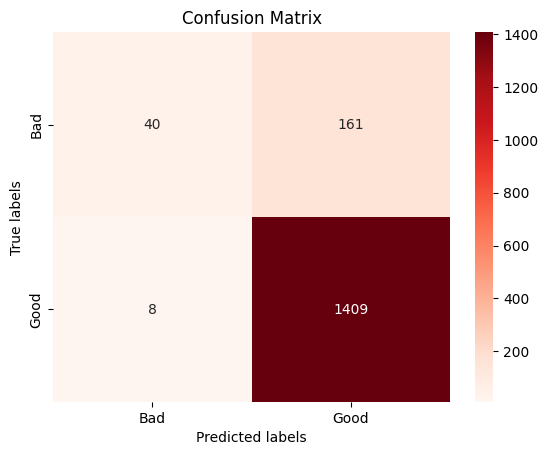

In [31]:
# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good']);

In [32]:
# Testing the model with sample 'Bad' review
demo_review = np.array(['disappointed'])
demo_review_X_test = tvec.transform(demo_review)
print(lr.predict(demo_review_X_test))

[0]


In [33]:
# testing the model with sample 'Good' review
demo_review_2 = np.array(['great service'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(lr.predict(demo_review_X_test_2))

[1]


**Conclusion**

Of the two models, Logistic regression model gives us better results as it's accuracy rate is 90% and has 169 false predictions in total.